<a href="https://colab.research.google.com/github/ankan-das-2001/learningDataScience/blob/master/tensorflowBeginning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
# imports
import tensorflow as tf 
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt


In [26]:
# Dataset is about MNIST fashion dataset which includes 60,000 images for training and 10,000 for testing
fashion_mnist=keras.datasets.fashion_mnist    # load dataset
(train_images, train_labels), (test_images,test_labels) = fashion_mnist.load_data()       #spilt into testing and training

In [27]:
print(train_images.shape)
print(test_images.shape)

(60000, 28, 28)
(10000, 28, 28)


In [28]:
# So we have got 60,000 images that are made up of 28x28 pixel(784 total)
train_images[0,23,23]
train_labels[:10]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

In [29]:
# our pixel values are between 0 and 255, 0 being black and 255 as white    
class_name = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

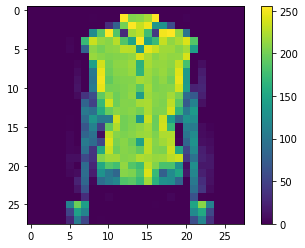

In [30]:
plt.figure() 
plt.imshow(train_images[76])
plt.colorbar()
plt.grid(False)
plt.show()

In [31]:
train_images = train_images/255.0

test_images = test_images/255.0

In [32]:
model = keras.Sequential([
                         keras.layers.Flatten(input_shape=(28,28)),       # input layer(1)
                         keras.layers.Dense(128,activation="relu"),      # hidden layer (2)
                         keras.layers.Dense(10,activation="softmax")      # output layer (3)
])

In [33]:
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])       # hyperparamete means all this loss metric, activation function

In [41]:
model.fit(train_images,train_labels,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3107 - accuracy: 0.8855
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2923 - accuracy: 0.8928
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2790 - accuracy: 0.8976
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2682 - accuracy: 0.9008
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2568 - accuracy: 0.9050
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2464 - accuracy: 0.9090
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2390 - accuracy: 0.9106
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2324 - accuracy: 0.9131
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2221 - accuracy: 0.9158
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.216

In [43]:
#finding the accuracy
test_loss,test_acc = model.evaluate(test_images,test_labels,verbose=1)
print('Test accuracy: ',test_acc)

313/313 [==============================] - 0s 1ms/step - loss: 0.3539 - accuracy: 0.8766
Test accuracy:  0.8766000270843506


In [51]:
predictions=model.predict(test_images)
print(class_name[np.argmax(predictions[10])])

Coat


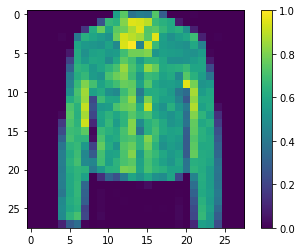

In [52]:
plt.figure()
plt.imshow(test_images[10])
plt.colorbar()
plt.grid(False)
plt.show()